<a href="https://colab.research.google.com/github/turbo-wolf/semantics/blob/main/Semantic_Structures_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set up**

In [ ]:
import pandas as pd
from IPython.display import display
import numpy as np

# **Intro: Know Thyself**

##The Delphic maxims are a set of moral precepts that were inscribed on the Temple of Apollo (amongst other things, the god of truth) in the ancient Greek precinct of Delphi. The best known maxim is "Know thyself" Although Ancient Greece was a long time ago, organisations today seek to do the same and data increasingly becomes a crucial part of this self-knowledge.

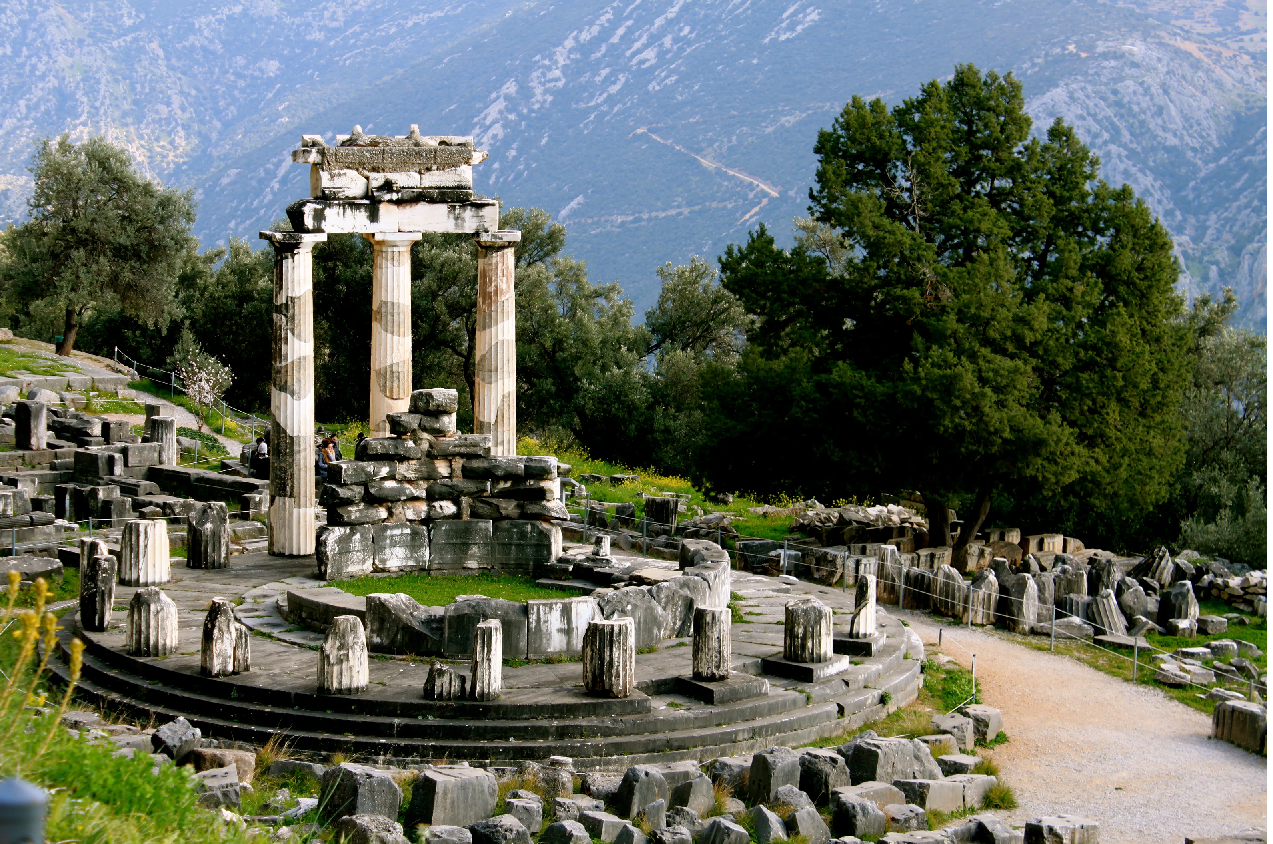

# **Semantic Structures: Intro**

##**What are they?**<br> Semantic structures are files or reposiroties containing business meaning and relationships. They represent the inherent connections between business 'concepts' (often physical but also ideological things in business operations e.g. customer, sales, invoice), enabling machines and humans to understand and process data and information in a more meaningful way.

###**Concepts and Dimensions?**<br> Example: APRA [Plain English Taxonomy](https://sbr-pet.apra.gov.au/index.html)<br><br>

##**Why are they necessary?**<br> Because they provide context and meaning to data, enabling better understanding, integration, interoperability, and intelligent processing and governance for improved insight and decision-making within an organization.

##**Some Examples**<br>




1.   **Taxonomy**: A hierarchical classification system.
2.   **Metadata Repository**: A structure/solution for storing/managing metadata.
3.   **Ontology**: Business concepts and relationships between them.
4.   **Data Catalogue**: Inventory of data assets enriched by metadata.
5.   **Glossary**: A list of terms and definitions.










# **Data Mesh Example: Taxonomy and Ontology**#

## **Problem Statement**<br>Data Meshes, while powerful, often struggle with true interoperability and composability. While data is made available by business domains, often a shared understanding of its meaning is not. Thus, Data silos persist, even within a mesh, because different domains use different terminologies and ontologies.<br>
## In the below example we will aim to showcase how a unified (enterprise) taxonomy and ontology can help solve a cross-domain reporting problem.  

## We will work through an example to answer these questions.

## **Step 1: Customer Data**

## Let's create data for three domains (Retail Customers, Corporate Customers, and Wealth Clients).

In [ ]:
# Step 1: Define base data

# Retail Customers (Individuals)
retail_data = {
    'Retail_Customer_ID': ['R001', 'R002', 'R003'],
    'Full_Name': ['Alice Smith', 'Bob Johnson', 'Charlie Lee'],
    'Email': ['alice@email.com', 'bob@email.com', 'charlie@email.com'],
    'Phone_Number': ['123-456-7890', '234-567-8901', '345-678-9012'],
    'Date_Of_Birth': ['1985-06-12', '1990-09-25', '1978-04-18']
}
retail_df = pd.DataFrame(retail_data)
print("Retail Customers (Individuals):")
display(retail_df)

# wealth data
wealth_data = {
    'Wealth_Client_ID': ['W001', 'W002', 'W003'],
    'Client_Name': ['Alice Smith', 'Charlie Lee', 'Frank Nelson'],
    'Investment_Portfolio_Value': ['$2,000,000', '$5,500,000', '$7,000,000'],
    'Financial_Advisor': ['Mr. White', 'Ms.Black', 'Mr. White'],
    'Preferred_Communication': ['Email', 'Phone', 'In-Person']
}
wealth_df = pd.DataFrame(wealth_data)

# Define corporate and wealth data
corporate_data = {
    'Corp_Customer_ID': ['C001', 'C002', 'C003'],
    'Company_Name': ['Acme Corp', 'Beta Ltd', 'Gamma Industries'],
    'Primary_Contact_Name': ['Alice Smith', 'David Green', 'Eve Adams'],
    'Business_Email': ['alice@acmecorp.com', 'david@betaltd.com', 'eve@gammaind.com'],
    'Tax_ID': ['98-7654321', '12-3456789', '34-5678901']
}
corporate_df = pd.DataFrame(corporate_data)

# Display the dataframes

print("\nCorporate Customers (Businesses):")
display(corporate_df)

print("\nWealth Clients (High-Net-Worth Individuals):")
display(wealth_df)

Retail Customers (Individuals):


Retail_Customer_ID    Full_Name              Email  Phone_Number  \
0               R001  Alice Smith    alice@email.com  123-456-7890   
1               R002  Bob Johnson      bob@email.com  234-567-8901   
2               R003  Charlie Lee  charlie@email.com  345-678-9012   

  Date_Of_Birth  
0    1985-06-12  
1    1990-09-25  
2    1978-04-18


Corporate Customers (Businesses):


Corp_Customer_ID      Company_Name Primary_Contact_Name      Business_Email  \
0             C001         Acme Corp          Alice Smith  alice@acmecorp.com   
1             C002          Beta Ltd          David Green   david@betaltd.com   
2             C003  Gamma Industries            Eve Adams    eve@gammaind.com   

       Tax_ID  
0  98-7654321  
1  12-3456789  
2  34-5678901


Wealth Clients (High-Net-Worth Individuals):


Wealth_Client_ID   Client_Name Investment_Portfolio_Value Financial_Advisor  \
0             W001   Alice Smith                 $2,000,000         Mr. White   
1             W002   Charlie Lee                 $5,500,000          Ms.Black   
2             W003  Frank Nelson                 $7,000,000         Mr. White   

  Preferred_Communication  
0                   Email  
1                   Phone  
2               In-Person

## **Step 2: Taxonomy Data: Data Mesh Simulation**

### Now let's simulate a data mesh by creating domain-specific taxonomies with synonyms and linking them to a shared business ontology. This demonstrates how to standardize terminology and improve data interoperability across silos. <br><br>**Note:** Domain_Relevance e.g. 0.25 shows the relevance of the concept "Client" to the "Commercial Banking" domain is relatively low (0.25 out of 1.0). This suggests that the term "Client" is not a primary or frequently used term in commercial banking. It might be used in some contexts but isn't as central as it would be in retail or wealth management. For example, Commercial Banking might prefer the term "Business" or "Company."

In [ ]:
import pandas as pd
import numpy as np

# Define domains and concepts
domains = ['Retail Banking', 'Wealth Management', 'Commercial Banking']
retail_concepts = ['Client', 'Checking Account', 'Savings Account', 'Debit Card', 'Loan']
wealth_concepts = ['Investor', 'Portfolio', 'Investment Account', 'Financial Advisor', 'Retirement Plan']
commercial_concepts = ['Business Entity', 'Credit Line', 'Commercial Loan', 'Relationship Manager', 'Treasury Service', "Customer"]
all_concepts = retail_concepts + wealth_concepts + commercial_concepts
domain_concepts = {
    'Retail Banking': retail_concepts,
    'Wealth Management': wealth_concepts,
    'Commercial Banking': commercial_concepts
}

# Define synonyms for each concept
concept_synonyms = {
    'Client': ['Customer', 'Patron', 'Account Holder'],
    'Checking Account': ['Current Account', 'Demand Deposit Account', 'Transaction Account'],
    'Savings Account': ['Deposit Account', 'Interest Account', 'Nest Egg'],
    'Debit Card': ['Bank Card', 'Check Card', 'ATM Card'],
    'Loan': ['Credit', 'Advance', 'Debt'],
    'Investor': ['Shareholder', 'Stockholder', 'Capital Provider'],
    'Portfolio': ['Holdings', 'Assets', 'Investments'],
    'Investment Account': ['Brokerage Account', 'Trading Account', 'Securities Account'],
    'Financial Advisor': ['Wealth Manager', 'Investment Consultant', 'Financial Planner'],
    'Retirement Plan': ['Pension Plan', '401k', 'Retirement Savings'],
    'Business Entity': ['Company', 'Firm', 'Organization'],
    'Credit Line': ['Line of Credit', 'Credit Facility', 'Revolving Credit'],
    'Commercial Loan': ['Business Loan', 'Corporate Loan', 'Enterprise Loan'],
    'Relationship Manager': ['Account Manager', 'Client Manager', 'Business Banker'],
    'Treasury Service': ['Cash Management', 'Financial Management', 'Funds Management'],
    'Customer': ['Client', 'Patron', 'Consumer']
}

# Generate Taxonomy Data
taxonomy_data = []
for concept in all_concepts:
    domain = np.random.choice(domains)
    concept_domain_relevance = round(np.random.uniform(0.7, 1.0), 2) if concept in domain_concepts[domain] else round(np.random.uniform(0.5, 0.69),2)

    # Use defined synonyms
    synonyms = np.random.choice(concept_synonyms.get(concept, [concept]))  # Use the synonym if available, otherwise use the concept itself.

    # Add a description appropriate to the concept
    if concept == 'Client' or concept == 'Investor' or concept == "Customer":
        description = "A party using financial services."
    elif concept == 'Checking Account':
        description = "Transactional deposit account."
    elif concept == 'Savings Account':
        description = "Interest-bearing deposit account."
    elif concept == 'Debit Card':
        description = "Card for point-of-sale transactions."
    elif concept == 'Loan':
        description = "Funds lent with repayment terms."
    elif concept == 'Portfolio':
        description = "Collection of financial investments."
    elif concept == 'Investment Account':
        description = "Account holding investments."
    elif concept == 'Financial Advisor':
        description = "Professional providing financial advice."
    elif concept == 'Retirement Plan':
        description = "Savings plan for retirement."
    elif concept == 'Business Entity':
        description = "A registered commercial organization."
    elif concept == 'Credit Line':
        description = "Available credit for business use."
    elif concept == 'Commercial Loan':
        description = "Loan for business purposes."
    elif concept == 'Relationship Manager':
        description = "Banker managing client relationships."
    elif concept == 'Treasury Service':
        description = "Services for managing business finances."
    else:
        description = "General financial service offering."  #Catch-all

    # Determine domain relevance for the synonym, ensuring it's lower than the concept
    if synonyms in domain_concepts[domain]:
        synonym_domain_relevance = round(np.random.uniform(0.1, concept_domain_relevance - 0.01), 2)  # High relevance, but LESS than the concept
    else:
        synonym_domain_relevance = round(np.random.uniform(0.01, 0.49), 2)  # Low relevance

    taxonomy_data.append({
        'Concept': concept,
        'Domain': domain,
        'Concept_Domain_Relevance': concept_domain_relevance,
        'Synonyms': synonyms,
        'Synonym_Domain_Relevance': synonym_domain_relevance,  # Synonym Relevance
        'Description': description  # Add the description
    })

taxonomy_df = pd.DataFrame(taxonomy_data)
taxonomy_df['Taxonomy_ID'] = [f'T{i:03d}' for i in range(1, len(taxonomy_df) + 1)]
taxonomy_df = taxonomy_df[['Taxonomy_ID','Concept', 'Domain', 'Concept_Domain_Relevance', 'Synonyms', 'Synonym_Domain_Relevance', 'Description']]  # Include Description in column order
print("\nTaxonomy Table:")
display(taxonomy_df)


Taxonomy Table:


Taxonomy_ID               Concept              Domain  \
0         T001                Client   Wealth Management   
1         T002      Checking Account      Retail Banking   
2         T003       Savings Account   Wealth Management   
3         T004            Debit Card  Commercial Banking   
4         T005                  Loan  Commercial Banking   
5         T006              Investor  Commercial Banking   
6         T007             Portfolio   Wealth Management   
7         T008    Investment Account      Retail Banking   
8         T009     Financial Advisor      Retail Banking   
9         T010       Retirement Plan      Retail Banking   
10        T011       Business Entity   Wealth Management   
11        T012           Credit Line      Retail Banking   
12        T013       Commercial Loan   Wealth Management   
13        T014  Relationship Manager      Retail Banking   
14        T015      Treasury Service      Retail Banking   
15        T016              Customer      Retail Banking   

    Concept_Domain_Relevance            Synonyms  Synonym_Domain_Relevance  \
0                       0.60      Account Holder                      0.27   
1                       0.88     Current Account                      0.21   
2                       0.65    Interest Account                      0.42   
3                       0.62            ATM Card                      0.07   
4                       0.64                Debt                      0.33   
5                       0.67         Shareholder                      0.33   
6                       0.82            Holdings                      0.15   
7                       0.50  Securities Account                      0.17   
8                       0.67      Wealth Manager                      0.32   
9                       0.63  Retirement Savings                      0.14   
10                      0.57                Firm                      0.07   
11                      0.56     Credit Facility                      0.13   
12                      0.62     Enterprise Loan                      0.20   
13                      0.54     Business Banker                      0.20   
14                      0.56     Cash Management                      0.42   
15                      0.53              Patron                      0.30   

                                 Description  
0          A party using financial services.  
1             Transactional deposit account.  
2          Interest-bearing deposit account.  
3       Card for point-of-sale transactions.  
4           Funds lent with repayment terms.  
5          A party using financial services.  
6       Collection of financial investments.  
7               Account holding investments.  
8   Professional providing financial advice.  
9               Savings plan for retirement.  
10     A registered commercial organization.  
11        Available credit for business use.  
12               Loan for business purposes.  
13     Banker managing client relationships.  
14  Services for managing business finances.  
15         A party using financial services.

## **Step 3: Ontology Data**

### Create ontology structure using two tables: entities (e.g., Customer, Business, Account) and relationships (e.g., "Owns", "Holds"). These tables  take concepts from the Taxonomy (map: Ontology Entity Name) and define their  interaction across the domains.###

In [ ]:
# Define entity data
entities_data = {
    'Entity_ID': ['E001', 'E002', 'E003'],
    'Entity_Name': ['Customer', 'Business', 'Account'],
    'Entity_Type': ['Person', 'Organization', 'Financial Product'],
    'Description': ['A person with a financial relationship', 'A corporate banking entity', 'A financial instrument (e.g., loan, investment)']
}
entities_df = pd.DataFrame(entities_data)

# Define relationships data
relationships_data = {
    'Relationship_ID': ['R001', 'R002', 'R003', 'R004'],
    'Source_Entity': ['Customer (E001)', 'Customer (E001)', 'Business (E002)', 'Customer (E001)'],
    'Target_Entity': ['Account (E003)', 'Business (E002)', 'Account (E003)', 'Customer (E001)'],
    'Relationship_Type': ['Owns', 'Is Primary Contact', 'Holds', 'Is Affiliated With'],
    'Applied_Relationship': ['Alice owns a wealth portfolio', 'Alice is the contact for Acme Corp', 'Acme Corp holds a corporate credit line', 'Alice (Wealth) is the same as Alice (Retail)']
}
relationships_df = pd.DataFrame(relationships_data)

# Mapping

entity_mappings = []
for index, row in entities_df.iterrows():
  entity_name = row['Entity_Name']
  # Find the matching taxonomy rows
  matching_taxonomies = taxonomy_df[taxonomy_df['Concept'] == entity_name]
  if not matching_taxonomies.empty: #only adds if we can map successfully
    for tax_index, tax_row in matching_taxonomies.iterrows():
      entity_mappings.append({
          'Entity_ID': row['Entity_ID'],
          'Taxonomy_ID': tax_row['Taxonomy_ID'],
          'Mapping_Confidence': round(np.random.uniform(0.7, 1.0),2) #Simulate mapping confidence
      })

entity_mappings_df = pd.DataFrame(entity_mappings)

# Display the dataframes

print("\\nEntities (Ontology Concepts):")
display(entities_df)

print("\\nEntity Mappings (Linking Entities to Taxonomy):")
display(entity_mappings_df)
print("\nRelationships (Ontology Connections):")
display(relationships_df)

\nEntities (Ontology Concepts):


Entity_ID Entity_Name        Entity_Type  \
0      E001    Customer             Person   
1      E002    Business       Organization   
2      E003     Account  Financial Product   

                                       Description  
0           A person with a financial relationship  
1                       A corporate banking entity  
2  A financial instrument (e.g., loan, investment)

\nEntity Mappings (Linking Entities to Taxonomy):


Entity_ID Taxonomy_ID  Mapping_Confidence
0      E001        T016                0.95


Relationships (Ontology Connections):


Relationship_ID    Source_Entity    Target_Entity   Relationship_Type  \
0            R001  Customer (E001)   Account (E003)                Owns   
1            R002  Customer (E001)  Business (E002)  Is Primary Contact   
2            R003  Business (E002)   Account (E003)               Holds   
3            R004  Customer (E001)  Customer (E001)  Is Affiliated With   

                           Applied_Relationship  
0                 Alice owns a wealth portfolio  
1            Alice is the contact for Acme Corp  
2       Acme Corp holds a corporate credit line  
3  Alice (Wealth) is the same as Alice (Retail)

### **UML Class Diagram**<br>Notice how these relationships are a data representation of this UML Class diagram. This is the power of ontologies, they can represent, in a machine and people readable format, the way a business functions.
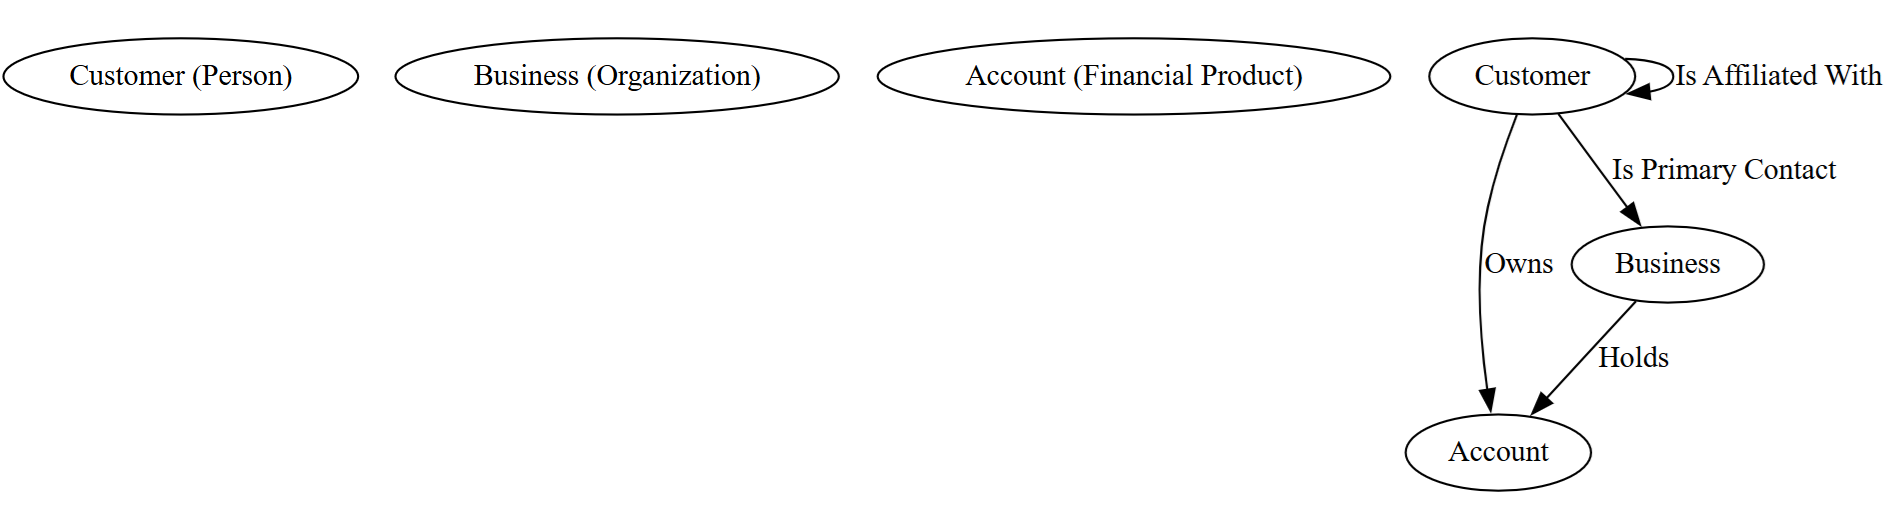

## **Step 4: Inference of Unified Customer ID**

### Using the Taxonomy and Ontology, the code now matches customers across "Retail" and "Wealth" systems based on the "Is Affiliated With" relationship.###

In [ ]:
# Sample DataFrames (Replace with your actual data loading)
retail_data = {'Retail_Customer_ID': ['R001', 'R002'],
               'Full_Name': ['Alice Smith', 'Bob Johnson'],
               'Email': ['alice.smith@example.com', 'bob.johnson@example.com']}
retail_df = pd.DataFrame(retail_data)

wealth_data = {'Wealth_Client_ID': ['W001', 'W002'],
               'Client_Name': ['Alice Smith', 'Charlie Davis'],
               'Financial_Advisor': ['Advisor A', 'Advisor B']}
wealth_df = pd.DataFrame(wealth_data)

relationships_data = {'Relationship_Type': ['Is Affiliated With'],
                     'Applied_Relationship': ['Alice Smith (Wealth)']}
relationships_df = pd.DataFrame(relationships_data)



# Step 3: Unification of Customer Records Using Relationships

# Initialize an empty list for the unified customer mapping
unified_mapping_data = []

# Iterate through the relationships and use them to unify the customer records
for index, relationship in relationships_df.iterrows():
    # Checking if relationship is "Is Affiliated With" (this will connect retail and wealth clients)
    if relationship['Relationship_Type'] == 'Is Affiliated With':
        # Extract the full name from the 'Applied_Relationship' column
        applied_relationship = relationship['Applied_Relationship']
        affiliated_name = applied_relationship.split('(')[0].strip()  # Extract name, remove extra spaces

        # Check if retail customer exists
        retail_customer = retail_df[retail_df['Full_Name'] == affiliated_name]
        if not retail_customer.empty:
            retail_customer_id = retail_customer['Retail_Customer_ID'].iloc[0]
            retail_email = retail_customer['Email'].iloc[0]
        else:
            retail_customer_id = None
            retail_email = None
            print(f"Retail customer '{affiliated_name}' not found.")

        # Check if wealth customer exists
        wealth_customer = wealth_df[wealth_df['Client_Name'] == affiliated_name]
        if not wealth_customer.empty:
            wealth_customer_id = wealth_customer['Wealth_Client_ID'].iloc[0]
            wealth_advisor = wealth_customer['Financial_Advisor'].iloc[0]
        else:
            wealth_customer_id = None
            wealth_advisor = None
            print(f"Wealth customer '{affiliated_name}' not found.")

        # Create unified customer IDs (example: U001, U002, etc.)
        unified_customer_id = f'U{index + 1:03d}'  # Just an example, you could create your own logic

        # If both retail and wealth customers are found, map them
        if retail_customer_id and wealth_customer_id:
            # Map Retail Customer to Unified Customer ID
            unified_mapping_data.append({
                'Unified_Customer_ID': unified_customer_id,
                'Source_System': 'Retail',
                'Domain_Specific_ID': retail_customer_id,
                'Customer_Name': affiliated_name,
                'Identifier_Type': 'Email',
                'Mapped_Value': retail_email
            })

            # Map Wealth Customer to Unified Customer ID
            unified_mapping_data.append({
                'Unified_Customer_ID': unified_customer_id,
                'Source_System': 'Wealth',
                'Domain_Specific_ID': wealth_customer_id,
                'Customer_Name': affiliated_name,
                'Identifier_Type': 'Advisor-tracked',
                'Mapped_Value': wealth_advisor
            })
        else:
            print(f"Skipping unification for '{affiliated_name}' due to missing data.")

# Check if we collected any data
if unified_mapping_data:
    unified_mapping_df = pd.DataFrame(unified_mapping_data)
    display(unified_mapping_df)
else:
    print("No unified customer records were created.")

Unified_Customer_ID Source_System Domain_Specific_ID Customer_Name  \
0                U001        Retail               R001   Alice Smith   
1                U001        Wealth               W001   Alice Smith   

   Identifier_Type             Mapped_Value  
0            Email  alice.smith@example.com  
1  Advisor-tracked                Advisor A

# **Semantic Structures: Drilldown**

##So, again, why do we need semantic structures? In short, it's best practice to create a single source of truth for reference and classificational data. This becomes exponentially usefull and time/cost saving down the data lifecycle stream, particularly in data discovery, reporting/analytrics and governance. Below are the most common onescompared.##

##**Comparison of Data Management Approaches**

###**Taxonomy:**	A hierarchical classification system that organizes information into categories and subcategories. A solid taxonomy is necessary to match the data from different source systems into a consistent structure in the DWH and other modelled data stores. Can be used in the Lake also for the same purpose.<br>**Metadata Repository:** A structure or solution for storing and managing metadata. Objective: provide a centralized and persistent store for all the descriptive information about data assets.<br>**Ontology:**	A formal representation of knowledge as a set of concepts within a domain and the relationships between those concepts, enabling reasoning and inference.<br>**Data Catalogue:**	A comprehensive inventory of data assets, including metadata, lineage, and usage information.<br>**Glossary:**	A list of terms and their definitions, providing a common vocabulary for an organization.

##**Taxonomy vs Metadata Repository vs Glossary**

###While Taxonomy, Metadata Repository and Glossary overlap (semantic information structures) and are created by similar roles, they have a different purpose:<br><br>**Taxonomy:** Focuses on the conceptual and logical organization of those terms. It's about creating a structured hierarchy to classify information.<br>**Metadata Repository:** Focuses on the physical organization of those terms. It's about creating a structured hierarchy to classify information.<br>**Glossary:** Is concerned with the definition and meaning of terms.<br><br>The Taxonomy will feed the Metadata Repository which will feed the Data Catalogue with necessary dimensional information.

##**Semantic Workflow: From Taxonomy to Consumer**

###**Process**

###As mentioned already, there is a logical flow from the business stakeholders who define business concepts to the artefacts that are consumed by system and user alike. Often these concepts are stored in records inside systems of reference (SoR) e.g. customer, invoices, sales. These are used to design a classification struture to make sense of them - a taxonomy. These definitions then flow down in a sequence (or workflow), as shown below. The ideal is for the taxonomy to be unified accross domains, that way all derivative artefacts and processes build their value using the same source.  

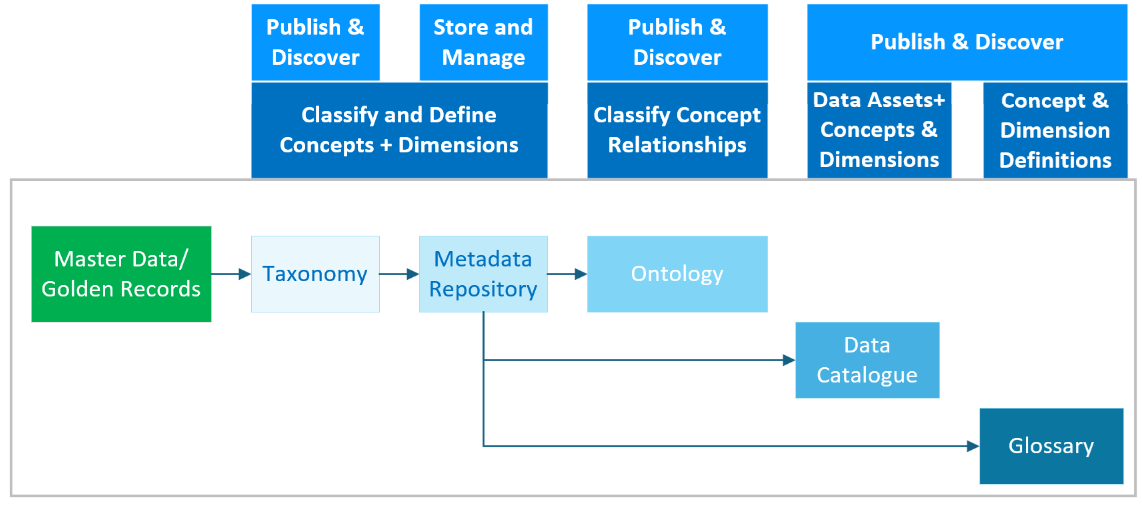

###**Roles**

### This order is shown in the table below, as well as the roles responsible for their definition, design, development and implementation.

In [ ]:
# Revised Creation Process and Roles data (excluding Semantic Model)
creation_process_data = {
    'Approach': ['Taxonomy', 'Metadata Repository', 'Ontology', 'Glossary', 'Data Catalogue'],
    'Creation Order': [1, 2, 3, 4, 5],  # Updated order
    'Responsible Role(s)': [
        'Business Users, Data Stewards, Information Architects', #Taxonomy
        'Data Governance Team, IT, Data Architects', #Metadata Repository
        'Data Scientists, Knowledge Engineers, Domain Experts, Collaboration Between Business and IT users', #Ontology
        'Business Users, Data Stewards, Subject Matter Experts (SMEs)',#Glossary
        'IT, Data Engineers, Data Governance Team',#Data Catalogue
    ]
}

creation_process_df = pd.DataFrame(creation_process_data)

# Display the table
print("Creation Process and Roles")
display(creation_process_df)

Creation Process and Roles


Approach  Creation Order  \
0             Taxonomy               1   
1  Metadata Repository               2   
2             Ontology               3   
3             Glossary               4   
4       Data Catalogue               5   

                                                                                 Responsible Role(s)  
0                                              Business Users, Data Stewards, Information Architects  
1                                                          Data Governance Team, IT, Data Architects  
2  Data Scientists, Knowledge Engineers, Domain Experts, Collaboration Between Business and IT users  
3                                       Business Users, Data Stewards, Subject Matter Experts (SMEs)  
4                                                           IT, Data Engineers, Data Governance Team

#### This can be further broken down into what each invividual role does to make this happen.

In [ ]:
data = {
    'Approach': ['Taxonomy', 'Taxonomy', 'Taxonomy', 'Taxonomy',
                 'Metadata Repository', 'Metadata Repository', 'Metadata Repository',
                 'Ontology', 'Ontology', 'Ontology', 'Ontology',
                 'Glossary', 'Glossary', 'Glossary',
                 'Data Catalogue', 'Data Catalogue', 'Data Catalogue'],
    'Responsible Role': ['Business Users', 'Data Stewards', 'Information Architects', 'Data Governance Team',
                         'Data Governance Team', 'IT', 'Data Architects',
                         'Data Governance Team', 'Data Scientists', 'Knowledge Engineers', 'Domain Experts',
                         'Data Governance Team', 'Business Users', 'Data Stewards',
                         'Data Governance Team', 'IT', 'Data Engineers'],
    'Role Description': [
        'Define and validate categories and relationships (under Data Governance guidance)',  # Business Users - TAXONOMY
        'Ensure data quality and adherence to taxonomy standards (under Data Governance guidance)',  # Data Stewards - TAXONOMY
        'Design the structure and hierarchy (in collaboration with Data Governance)',  # Information Architects - TAXONOMY
        'Publish, govern, and maintain the taxonomy; ensures alignment with business strategy and data governance policies.',  # Data Governance Team - TAXONOMY
        'Govern and maintain the repository; ensures alignment with data governance policies.', # Data Governance Team - METADATA REPO
        'Implement and manage the repository infrastructure', # IT - METADATA REPO
        'Design the repository schema and data model', # Data Architects - METADATA REPO
        'Oversee the development and maintenance of the ontology; ensure alignment with taxonomy.', # Data Governance Team - ONTOLOGY
        'Develop and maintain the ontology', # Data Scientists - ONTOLOGY
        'Codify domain knowledge into the ontology', # Knowledge Engineers - ONTOLOGY
        'Provide subject matter expertise', # Domain Experts - ONTOLOGY
        'Govern and maintain the glossary; ensures alignment with business terminology and data governance policies.',# Data Governance Team - GLOSSARY
        'Define business terms and definitions', # Business Users - GLOSSARY
        'Ensure consistent terminology', # Data Stewards - GLOSSARY
        'Govern and maintain the data catalogue; ensures alignment with data governance policies and taxonomy.', # Data Governance Team - DATA CATALOGUE
        'Implement and manage the data catalogue', # IT - DATA CATALOGUE
        'Engineer and maintain the data catalogue infrastructure'  # Data Engineers - DATA CATALOGUE
    ],
}

# Create the DataFrame
df = pd.DataFrame(data)

# Custom order for Taxonomy
taxonomy_order = ['Business Users', 'Data Stewards', 'Information Architects', 'Data Governance Team']

# Function to sort Taxonomy roles
def custom_sort(row):
    if row['Approach'] == 'Taxonomy':
        return taxonomy_order.index(row['Responsible Role'])
    return len(taxonomy_order)  # Place non-Taxonomy rows at the end

# Apply the custom sorting
df['sort_order'] = df.apply(custom_sort, axis=1)
df = df.sort_values(by='sort_order').drop('sort_order', axis=1).reset_index(drop=True)

# Display the table
print("Creation Process and Roles (Detailed)")
display(df)

Creation Process and Roles (Detailed)


Approach        Responsible Role  \
0              Taxonomy          Business Users   
1              Taxonomy           Data Stewards   
2              Taxonomy  Information Architects   
3              Taxonomy    Data Governance Team   
4   Metadata Repository    Data Governance Team   
5   Metadata Repository                      IT   
6   Metadata Repository         Data Architects   
7              Ontology    Data Governance Team   
8              Ontology         Data Scientists   
9              Ontology     Knowledge Engineers   
10             Ontology          Domain Experts   
11             Glossary    Data Governance Team   
12             Glossary          Business Users   
13             Glossary           Data Stewards   
14       Data Catalogue    Data Governance Team   
15       Data Catalogue                      IT   
16       Data Catalogue          Data Engineers   

                                                                                                      Role Description  
0                                    Define and validate categories and relationships (under Data Governance guidance)  
1                             Ensure data quality and adherence to taxonomy standards (under Data Governance guidance)  
2                                           Design the structure and hierarchy (in collaboration with Data Governance)  
3   Publish, govern, and maintain the taxonomy; ensures alignment with business strategy and data governance policies.  
4                                 Govern and maintain the repository; ensures alignment with data governance policies.  
5                                                                   Implement and manage the repository infrastructure  
6                                                                          Design the repository schema and data model  
7                             Oversee the development and maintenance of the ontology; ensure alignment with taxonomy.  
8                                                                                    Develop and maintain the ontology  
9                                                                            Codify domain knowledge into the ontology  
10                                                                                    Provide subject matter expertise  
11         Govern and maintain the glossary; ensures alignment with business terminology and data governance policies.  
12                                                                               Define business terms and definitions  
13                                                                                       Ensure consistent terminology  
14               Govern and maintain the data catalogue; ensures alignment with data governance policies and taxonomy.  
15                                                                             Implement and manage the data catalogue  
16                                                             Engineer and maintain the data catalogue infrastructure

##**Workflow Example**

###The below table showns how the data from a taxonomy flows down into derivative semantic structures.

In [ ]:
# Table 1: Taxonomy
taxonomy_data = {
    'Category': ['Customer Type', 'Customer Type', 'Account Type', 'Account Type'],
    'Term': ['Individual', 'Business', 'Savings', 'Checking'],
    'Description': [
        'A customer who is a single person, not a business or organization.',
        'A customer that is a registered business or organization.',
        'An account designed to hold savings and earn interest.',
        'An account for everyday transactions.'
    ]
}
taxonomy_df = pd.DataFrame(taxonomy_data)

# Table 2: Metadata Repository
metadata_repository_data = {
    'Metadata Element': ['Customer.CustomerType', 'Account.AccountType', 'Customer.CustomerID', 'Account.AccountNumber'],
    #'Description': ['Category of customer (Individual or Business)', 'Category of account (Savings or Checking)', 'Unique identifier for a customer', 'Unique identifier for an account'], # Removed full Descriptions
    'Description': ['Customer type category', 'Account type category', 'Unique customer identifier', 'Unique account identifier'], # Simplified
    'Type': ['Taxonomy Term', 'Taxonomy Term', 'Data Element Attribute', 'Data Element Attribute'],
    'Source': ['Taxonomy', 'Taxonomy', 'Data Catalogue', 'Data Catalogue'],
    'Taxonomy Category': ['Customer Type', 'Account Type', None, None], # Added Taxonomy Category to help link
    'Taxonomy Term': ['Individual', 'Savings', None, None] # Added Taxonomy Term
}
metadata_repository_df = pd.DataFrame(metadata_repository_data)

# Table 3: Ontology
ontology_data = {
    'Concept': ['Customer', 'Account', 'Individual', 'Organization'],
    'Properties': [['hasID', 'hasName', 'hasAddress'], ['hasAccountNumber', 'hasBalance'], [], []],
    'Relationships': ['`owns` Account', '`isOwnedBy` Customer', '', ''],
    'Source': ['Inferred from Data Catalogue and Taxonomy','Inferred from Data Catalogue and Taxonomy','Taxonomy', 'Taxonomy']
}
ontology_df = pd.DataFrame(ontology_data)

# Table 4: Glossary
glossary_data = {
    'Term': ['Customer', 'Account'],
    'Definition': ['An individual or organization that purchases goods or services (defined using Ontology: Customer)',
                   'A record of financial transactions for a customer (defined using Ontology: Account)'],
    'Source': ['Ontology','Ontology']
}
glossary_df = pd.DataFrame(glossary_data)

# Table 5: Data Catalogue
data_catalogue_data = {
    'Data Element': ['Customer ID', 'Account Number'],
    'Description': ['Unique identifier for a customer.', 'Unique identifier for an account.'],
    'Data Type': ['Integer', 'String'],
    'Source': ['CRM', 'Banking System'],
    'Taxonomy Terms': ['Individual, Business', 'Savings, Checking']
}
data_catalogue_df = pd.DataFrame(data_catalogue_data)

# Display the tables
print("Table 1: Taxonomy (MODIFIED)")
display(taxonomy_df)

print("\nTable 2: Metadata Repository (MODIFIED)")
display(metadata_repository_df)

print("\nTable 3: Ontology (MODIFIED)")
display(ontology_df)

print("\nTable 4: Glossary (MODIFIED)")
display(glossary_df)

print("\nTable 5: Data Catalogue")
display(data_catalogue_df)

Table 1: Taxonomy (MODIFIED)


Category        Term  \
0  Customer Type  Individual   
1  Customer Type    Business   
2   Account Type     Savings   
3   Account Type    Checking   

                                                          Description  
0  A customer who is a single person, not a business or organization.  
1           A customer that is a registered business or organization.  
2              An account designed to hold savings and earn interest.  
3                               An account for everyday transactions.


Table 2: Metadata Repository (MODIFIED)


Metadata Element                 Description                    Type  \
0  Customer.CustomerType      Customer type category           Taxonomy Term   
1    Account.AccountType       Account type category           Taxonomy Term   
2    Customer.CustomerID  Unique customer identifier  Data Element Attribute   
3  Account.AccountNumber   Unique account identifier  Data Element Attribute   

           Source Taxonomy Category Taxonomy Term  
0        Taxonomy     Customer Type    Individual  
1        Taxonomy      Account Type       Savings  
2  Data Catalogue              None          None  
3  Data Catalogue              None          None


Table 3: Ontology (MODIFIED)


Concept                      Properties         Relationships  \
0      Customer    [hasID, hasName, hasAddress]        `owns` Account   
1       Account  [hasAccountNumber, hasBalance]  `isOwnedBy` Customer   
2    Individual                              []                         
3  Organization                              []                         

                                      Source  
0  Inferred from Data Catalogue and Taxonomy  
1  Inferred from Data Catalogue and Taxonomy  
2                                   Taxonomy  
3                                   Taxonomy


Table 4: Glossary (MODIFIED)


Term  \
0  Customer   
1   Account   

                                                                                          Definition  \
0  An individual or organization that purchases goods or services (defined using Ontology: Customer)   
1                A record of financial transactions for a customer (defined using Ontology: Account)   

     Source  
0  Ontology  
1  Ontology


Table 5: Data Catalogue


Data Element                        Description Data Type  \
0     Customer ID  Unique identifier for a customer.   Integer   
1  Account Number  Unique identifier for an account.    String   

           Source        Taxonomy Terms  
0             CRM  Individual, Business  
1  Banking System     Savings, Checking

# **Gen AI Application**

###The principles outlined in the original statement about data accuracy, single sources of truth, and system of record are extremely relevant, and arguably critical, to successful GenAI implementation. Here's how:<br><br>**1. GenAI Relies on Data Quality:** <br>GenAI models learn from data. If the data is inaccurate, incomplete, inconsistent, or biased, the resulting AI model will be flawed. Garbage in, garbage out. A single source of truth ensures that the GenAI model is trained on the best possible data.<br><br>**2. Hallucinations and Trustworthiness:** <br>GenAI models can sometimes produce outputs that are factually incorrect or nonsensical (hallucinations). Training the model on verified data from a single source of truth reduces the likelihood of hallucinations and increases trust in the AI's output. When the source data is reliable, the AI has a higher probability of generating reliable results.<br><br>**3. Explainability and Traceability:** <br>When a GenAI model makes a decision or provides an answer, it's important to understand why. Having a clear lineage of data from a system of record to the GenAI model allows you to trace the source of the information and verify its accuracy. This is crucial for accountability and compliance.<br><br>**4. Preventing Data Leakage and Maintaining Data Governance:** <br>GenAI models can inadvertently expose sensitive or confidential data if not properly trained and managed. A single source of truth allows you to implement security and access controls at the data source, which is then propagated to the AI model. This helps prevent data leakage and ensures compliance with data privacy regulations.<br><br>**5. Consistent and Reliable GenAI Applications:** <br>Imagine using a GenAI tool for customer service. If the AI is trained on conflicting data from different sources, it might provide inconsistent answers to the same question, leading to customer confusion and frustration. A single source of truth ensures that the AI provides consistent and reliable information.<br><br>**6. Knowledge Graphs and Semantic Understanding:** <br>GenAI often benefits from using Knowledge Graphs which represent entities, relationships, and attributes in a structured way. A single source of truth helps ensure the accuracy and consistency of the information within the Knowledge Graph, leading to better semantic understanding and more accurate GenAI results.